In [1]:
%pip install opencv-python numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

Note: using train dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
test dataset using https://arxiv.org/abs/2307.02848

In [3]:
import os
import sys

module_path = os.path.abspath(".")

# if module_path not in sys.path:
sys.path.append(module_path)

import dataset
import segmentation
from dataset import *
from segmentation import *

In [4]:
x_normal, x_tb = get_dataset()
x_normal_test, x_tb_test = get_dataset_test()
# x_tb=x_tb[x_tb != None]

In [5]:
x_normal_test

[array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0, 255, ..., 255,   0,   0],
        ...,
        [  0,   0, 224, ..., 249,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], shape=(516, 516), dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0, 246, ..., 255,   0,   0],
        ...,
        [  0,   0, 103, ..., 202,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], shape=(516, 516), dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0, 255, ..., 255,   0,   0],
        ...,
        [  0,   0, 218, ..., 255,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], shape=(516, 516), dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
       

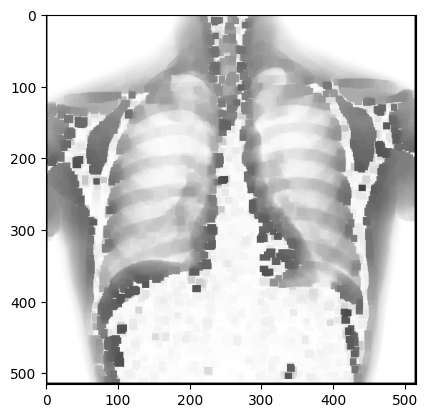

In [6]:
pyplot.imshow(x_normal[0],cmap='gray')

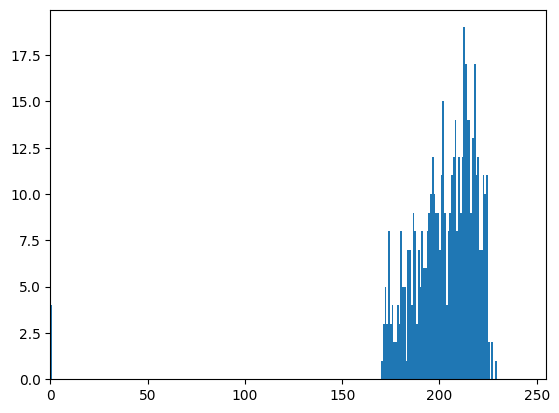

In [7]:
vals = x_normal[0].mean(axis=0).flatten()
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

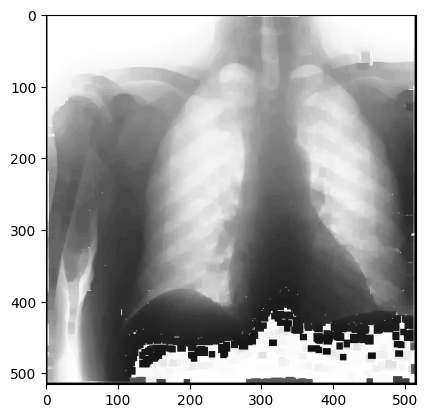

In [8]:
pyplot.imshow((x_normal_test[2]),cmap="gray")

In [9]:
image = x_tb_test[0]

In [10]:
ret3,th3 = cv2.threshold(image,0,255,cv2.THRESH_OTSU)

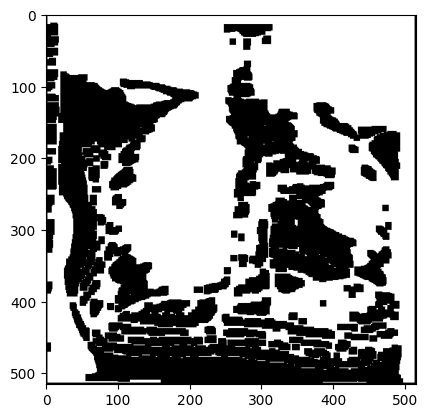

In [11]:
pyplot.imshow(th3,cmap="gray")

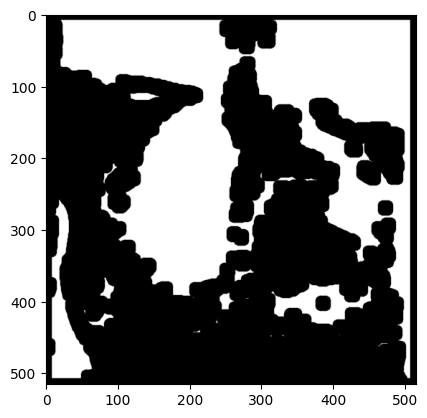

In [12]:
pyplot.imshow(get_segmentation(x_tb_test[0]),cmap="gray")

In [13]:
get_segmentation(x_tb_test[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(516, 516), dtype=uint8)

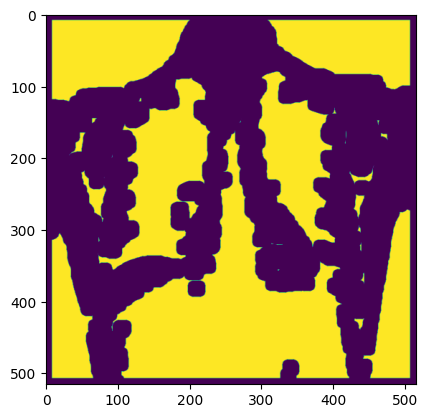

In [14]:
pyplot.imshow(get_segmentation(x_normal[0]))

In [15]:
np.array(x_tb).shape

(3294, 516, 516)

In [16]:
x=[get_segmentation(x) for x in x_normal[:]]
y=["normal"]*len(x_normal[:])
x=x+[get_segmentation(x) for x in x_tb]
y=y+["tb"]*len(x_tb)
dict = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

x_test=[get_segmentation(x_test) for x_test in x_normal_test]
y_test=["normal"]*len(x_normal_test)
x_test=x_test+[get_segmentation(x_test) for x_test in x_tb_test]
y_test=y_test+["tb"]*len(x_tb_test)
dict_test = {
    "x": np.asarray(x_test),
    "y": np.asarray(y_test)
}

In [17]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en

In [19]:
dict["x"].shape

(7608, 516, 516)

In [20]:
X_reshaped = dict["x"].reshape(dict["x"].shape[0], dict["x"].shape[1]*dict["x"].shape[2])
X_reshaped_test = dict_test["x"].reshape(dict_test["x"].shape[0], dict_test["x"].shape[1]*dict_test["x"].shape[2])

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, dict["y"] ,
                                   random_state=42, 
                                   test_size=0.1, 
                                   shuffle=True)

# _____, X_test, ___, y_test = train_test_split(X_reshaped_test, dict_test["y"] ,
#                                    random_state=42, 
#                                    test_size=0.9999, 
#                                    shuffle=True)

In [22]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [23]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [25]:
# # Creating a support vector classifier
# clfsvc = make_pipeline(
#     RobustScaler(),
#     LinearSVC(random_state=42, tol=1e-5, class_weight="balanced",max_iter=500, C=1),
#     # RandomForestClassifier(random_state=42,max_depth=50)
# )

from sklearn.feature_selection import RFE

# model = xgb.XGBClassifier(early_stopping_rounds=5, eval_metric='logloss')
model = xgb.XGBClassifier()

rfe = RFE(estimator=model, n_features_to_select=2662, step=0.5)

In [26]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)>

In [27]:
# clf.fit(X_train, y_train)

In [28]:
le = LabelEncoder()
new_y_train = le.fit_transform(y_train)
new_y_val = le.fit_transform(y_val)

In [29]:
new_y_train

array([0, 1, 0, ..., 0, 1, 1], shape=(6847,))

In [30]:
new_y_val.shape

(761,)

In [31]:
X_val.shape

(761, 266256)

In [32]:
rfe.fit(X_train, new_y_train, 
        # eval_set=[(X_val, new_y_val)]
        )

,estimator,"XGBClassifier...ree=None, ...)"
,n_features_to_select,2662
,step,0.5
,verbose,0
,importance_getter,'auto'
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None


In [33]:
# result = clf.predict(X_reshaped_test)

In [48]:
result_xgb = rfe.predict(X_reshaped_test)

In [49]:
result_xgb

array([0, 1, 1, ..., 1, 1, 1], shape=(4200,))

In [47]:
le.classes_

array(['normal', 'tb'], dtype='<U6')

In [37]:
new_y_test = le.fit_transform(dict_test['y'].astype(str))

In [38]:
# accuracy_score(dict_test['y'], result_xgb)
accuracy_score(new_y_test, result_xgb)

0.7376190476190476

0.7376190476190476 xgb 26626 same as 2662

In [39]:
from sklearn.metrics import classification_report

In [40]:
# print(classification_report(dict_test['y'], result_xgb))
print(classification_report(new_y_test, result_xgb))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      3500
           1       0.38      0.92      0.54       700

    accuracy                           0.74      4200
   macro avg       0.68      0.81      0.68      4200
weighted avg       0.88      0.74      0.77      4200



In [41]:
rfe.predict([x_tb_test[10].reshape(x_tb_test[10].shape[0]*x_tb_test[10].shape[1])])

array([1])

In [42]:
from joblib import dump, load

In [44]:
dump(rfe, "xgb_rfe.joblib")

['xgb_rfe.joblib']